#### 1. seaborm 시각화 기본 학습하기

In [9]:
#!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests

In [2]:
# 그래프에 한글 사용 설정
from matplotlib import font_manager, rc
font_path = 'c:/Windows/Fonts/NGULIM.ttf'  # 폰트가 설치되어 있는 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
import warnings
# 모든 경고 무시
warnings.filterwarnings('ignore')

In [4]:
# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
import pandas as pd
import numpy as np
data = {'name':['이순신','김유신','홍길동','고길동','이이'],
        'sex' : ['남', '여', '남', '여','남'],
        'kor':[100,88,88,99,100],
        'eng':[88,67,98,100,80],
        'mat':[89,99,100,78,85],
}
df = pd.DataFrame(data)
df

,name,sex,kor,eng,mat
0,이순신,남,100,88,89
1,김유신,여,88,67,99
2,홍길동,남,88,98,100
3,고길동,여,99,100,78
4,이이,남,100,80,85


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    5 non-null      object
 1   sex     5 non-null      object
 2   kor     5 non-null      int64 
 3   eng     5 non-null      int64 
 4   mat     5 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 332.0+ bytes


Text(0.5, 28.01562500000002, 'name')

<Figure size 1000x300 with 0 Axes>

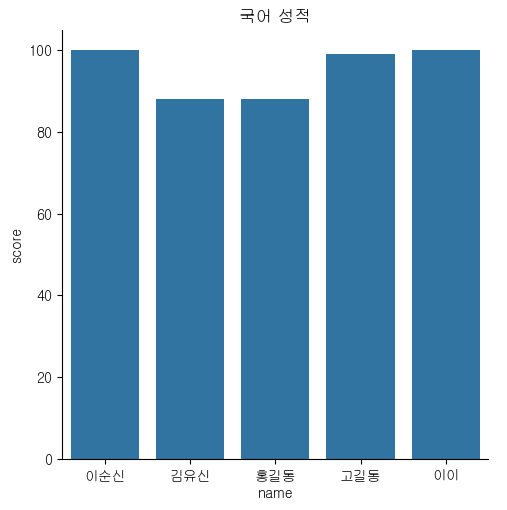

In [8]:
# 크기 조정
plt.figure(figsize=(10,3))
sns.catplot(kind='bar',x="name", y="kor", data=df)

# 개인화
plt.title('국어 성적')
plt.ylabel("score")
plt.xlabel("name")

Text(0.5, 0, 'name')

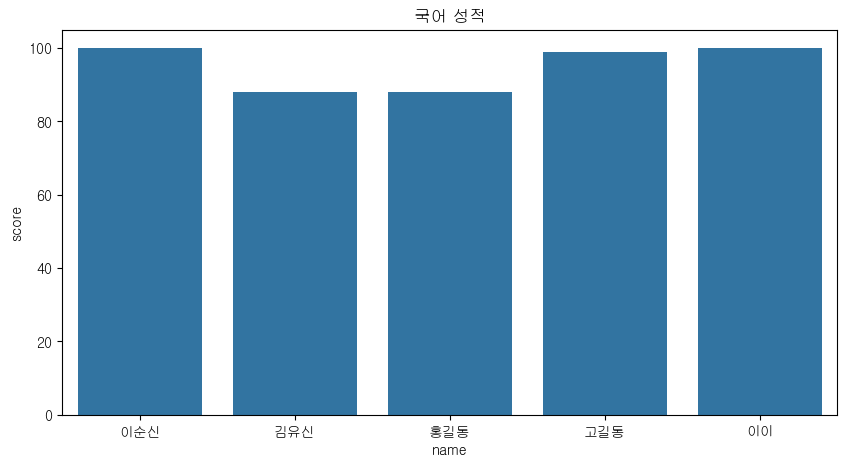

In [18]:
# 크기 조정
plt.figure(figsize=(10,5))

# 시각화
sns.barplot(x="name", y="kor", data=df)

# 개인화
plt.title('국어 성적')
plt.ylabel("score")
plt.xlabel("name")

Text(0.5, 0, 'name')

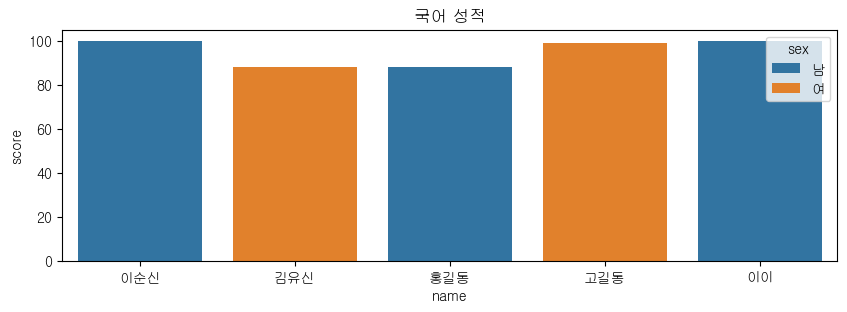

In [19]:
# 크기 조정
plt.figure(figsize=(10,3))

#시각화
sns.barplot(x='name', y='kor', hue ='sex', data=df)

# 개인화
plt.title('국어 성적')
plt.ylabel('score')
plt.xlabel('name')

#### palette = : 컬러팔레트 키워드
- deep, muted, bright, pastel, dark, colorblind, husl, flare, Paired, rocket, mako, 
- crest, magma, viridis, seagreen, Blues, YlOrBr, Spectral, coolwarm

Text(0.5, 0, 'name')

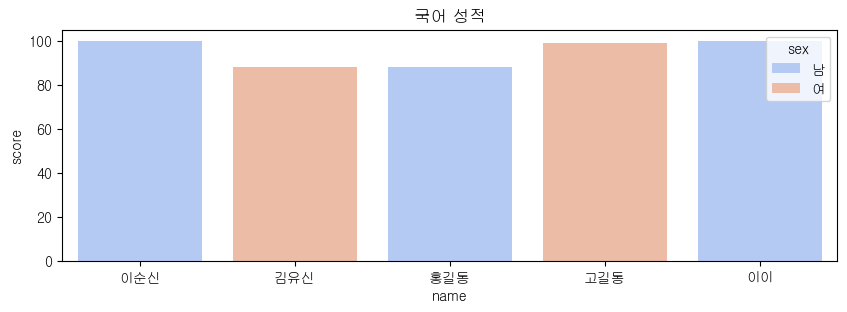

In [22]:
# 크기 조정
plt.figure(figsize=(10,3))

#시각화
# sns.barplot(x="name", y="kor", hue ='sex', data=df, palette = 'Blues')
sns.barplot(x='name', y='kor', hue ='sex', data=df, palette = 'coolwarm')
# 개인화
plt.title('국어 성적')
plt.ylabel('score')
plt.xlabel('name')

<Axes: xlabel='sex', ylabel='kor'>

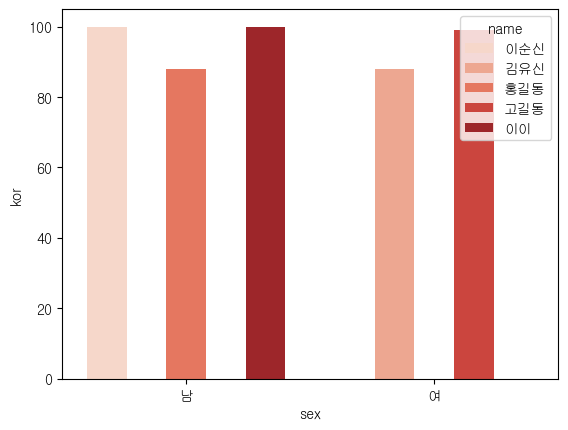

In [23]:
# 여러 열에서 집단 묶어서 세부 집단 시각화 하기 
# hue 파라미터 추가
sns.barplot(x= 'sex',y= 'kor',hue='name', data= df, palette = 'Reds')

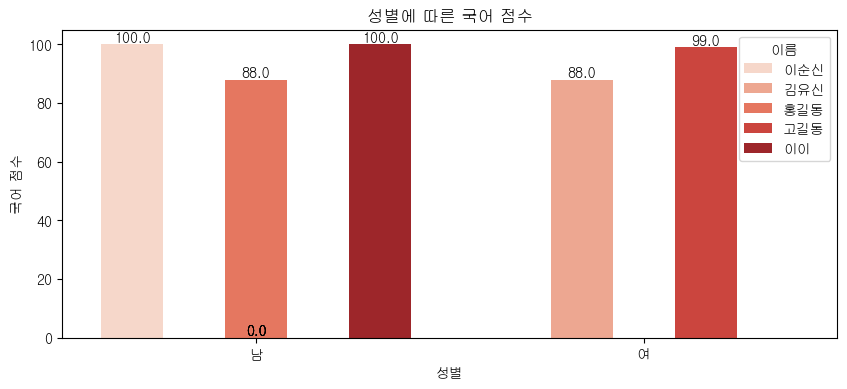

In [24]:
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x='sex', y='kor', hue='name', data=df, palette='Reds')

# 데이터 값을 막대 위에 텍스트로 표시
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('성별')
plt.ylabel('국어 점수')
plt.title('성별에 따른 국어 점수')
plt.legend(title='이름')
plt.show()

Text(0.5, 0, 'name')

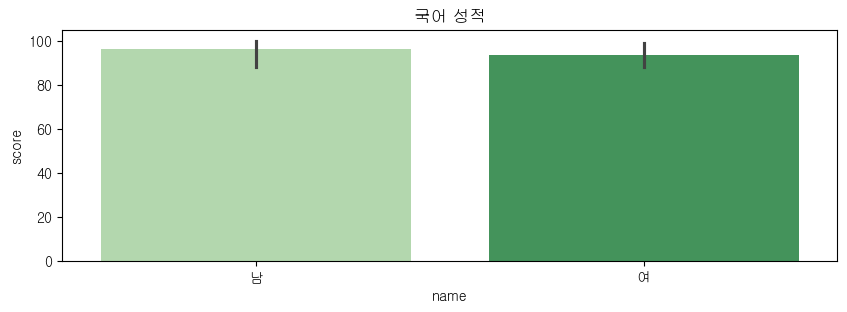

In [24]:
# 크기 조정
plt.figure(figsize=(10,3))
#시각화
sns.barplot(x="sex", y="kor", data=df, palette = 'Greens') # 'sex'의 평균 집계해서 시각화하기

# 개인화
plt.title('국어 성적')
plt.ylabel("score")
plt.xlabel("name")

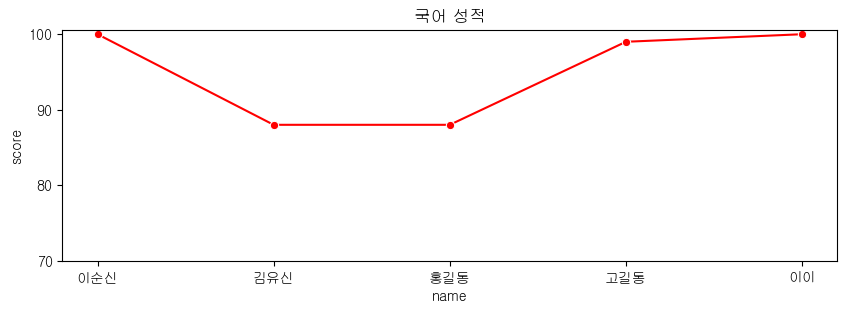

In [40]:
# 크기 조정
plt.figure(figsize=(10, 3))

# 시각화: 라인 그래프에 마크 추가
sns.lineplot(x="name", y="kor", data=df, marker='o', color = 'r')

# 개인화
plt.title('국어 성적')
plt.ylabel("score")
plt.xlabel("name")

# Y축 간격을 10 단위로 설정
plt.yticks(range(70, 101, 10)) #plt.ylim(50, 100)
plt.show()

In [42]:
# 카테고리 변수 내용 확인 
# df['sex'].unique()  
df.sex.unique() 

array(['남', '여'], dtype=object)

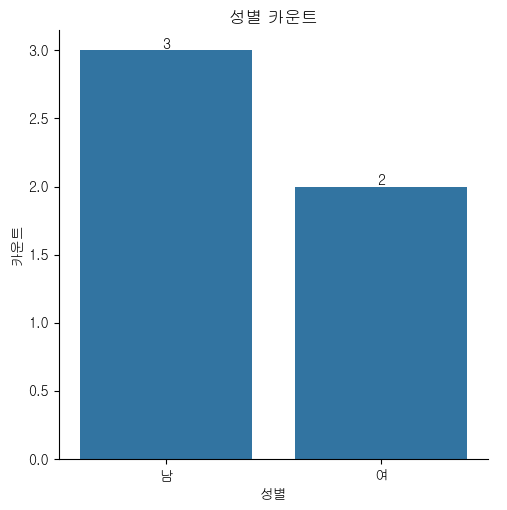

In [25]:
# 성별 카운트 시각화
cat_plot = sns.catplot(x='sex', kind='count', data=df)

# 각 막대 위에 카운트 값 표시
for ax in cat_plot.axes.flat:  #생성된 플롯의 모든 축을 반복
    for p in ax.patches:  #각 축의 패치(막대)를 반복
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.title('성별 카운트')
plt.xlabel('성별')
plt.ylabel('카운트')
plt.show()

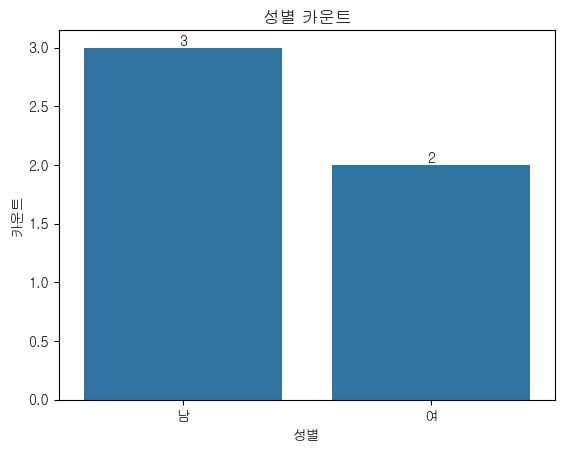

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 성별 카운트 시각화
cat_plot = sns.countplot(x='sex', data=df)

# 각 막대 위에 카운트 값 표시
for p in cat_plot.patches:  # 각 패치(막대)를 반복
    cat_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=10, color='black')

plt.title('성별 카운트')
plt.xlabel('성별')
plt.ylabel('카운트')
plt.show()

### relplot()
- x : x축 값,  y : y축 값
- hue : 다른 색깔로 그룹화하는 변수
- size : 다른 크기로 그룹화하는 변수
- style : 다른 모양으로 그룹화하는 변수
- data : 입력 데이터 (pandas.DataFrame)
- row : 행으로 subsets 구성할 데이터
- col : 열로 subsets 구성할 데이터
- palette : 색조 의미를 매핑 할 때 사용할 색상을 선택하는 방법
- sizes : size 인자를 사용할 때 크기를 선택하는 방법을 결정하는 오브젝트.
         - 다른 값이 이 범위 내에서 정규화되도록 사용할 최소 및 최대 크기를 지정하는 튜플
- kind : plot의 종류. scatter, line (default : 'scatter')

In [30]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


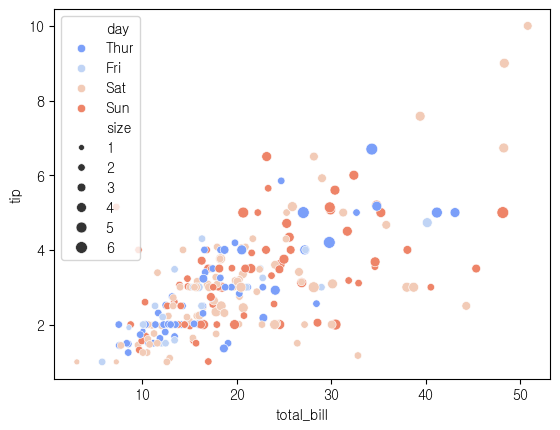

In [31]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", size='size', palette='coolwarm')
plt.show()

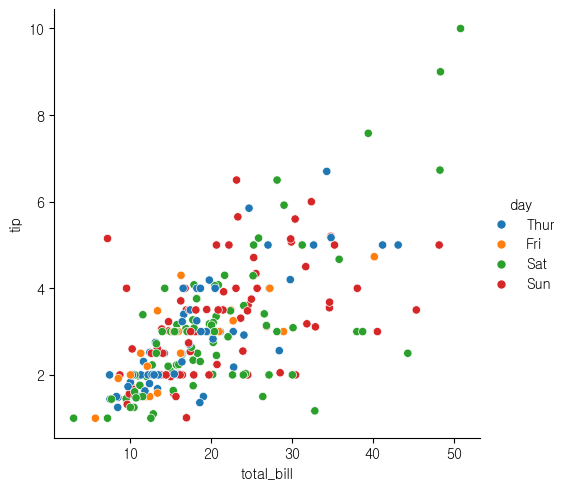

In [33]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)
# sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

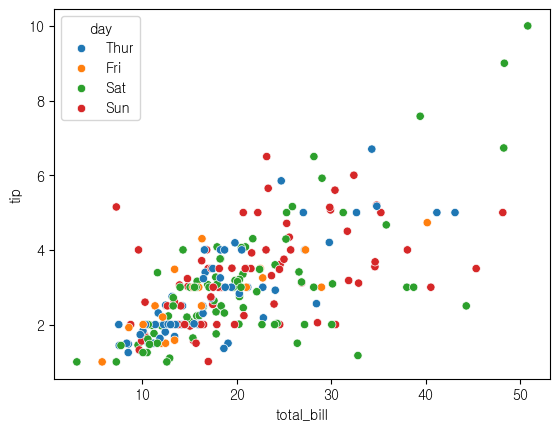

In [34]:
# sns.relplot(x="total_bill", y="tip", hue="day", data=tips)
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

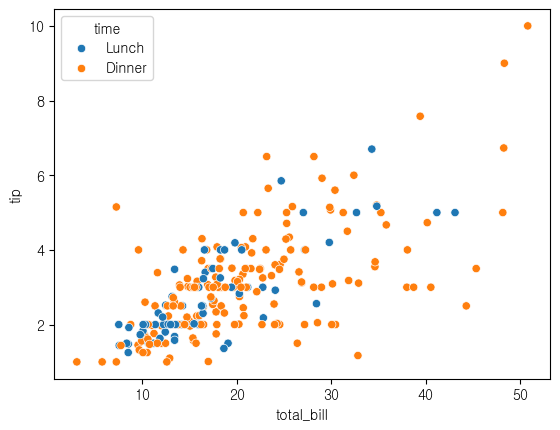

In [35]:
# sns.relplot(x="total_bill", y="tip", data=tips, hue='time')
sns.scatterplot(x="total_bill", y="tip", data=tips, hue='time')

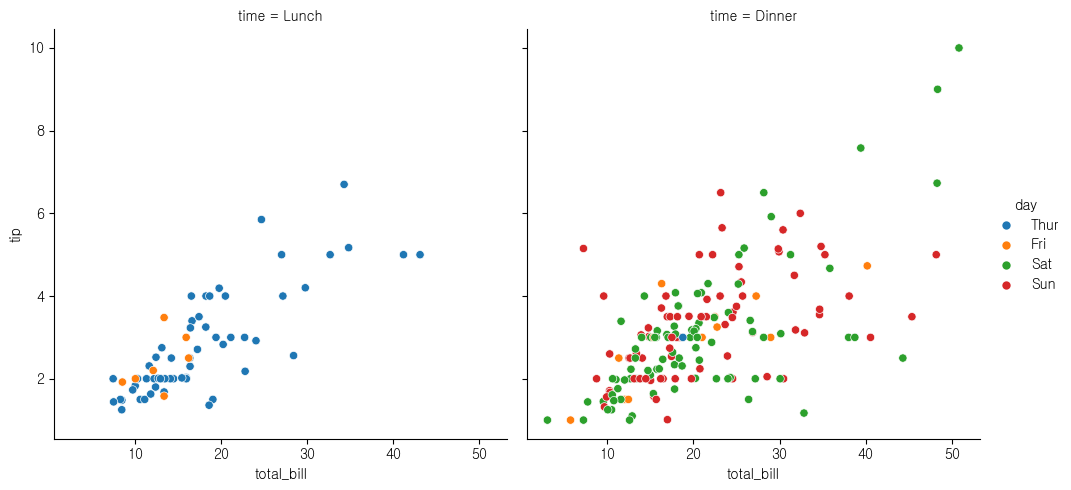

In [40]:
sns.relplot(x="total_bill", y="tip", hue="day", col="time", data=tips)
plt.show()

In [78]:
#  hue와 col 매개변수를 동시에 사용할 때는 sns.relplot을 사용하는 것이 일반적이다.
# sns.scatterplot(x="total_bill", y="tip", hue="day", col="time", data=tips) # hue와 col 함께 사용시 오류 발생
# plt.show()

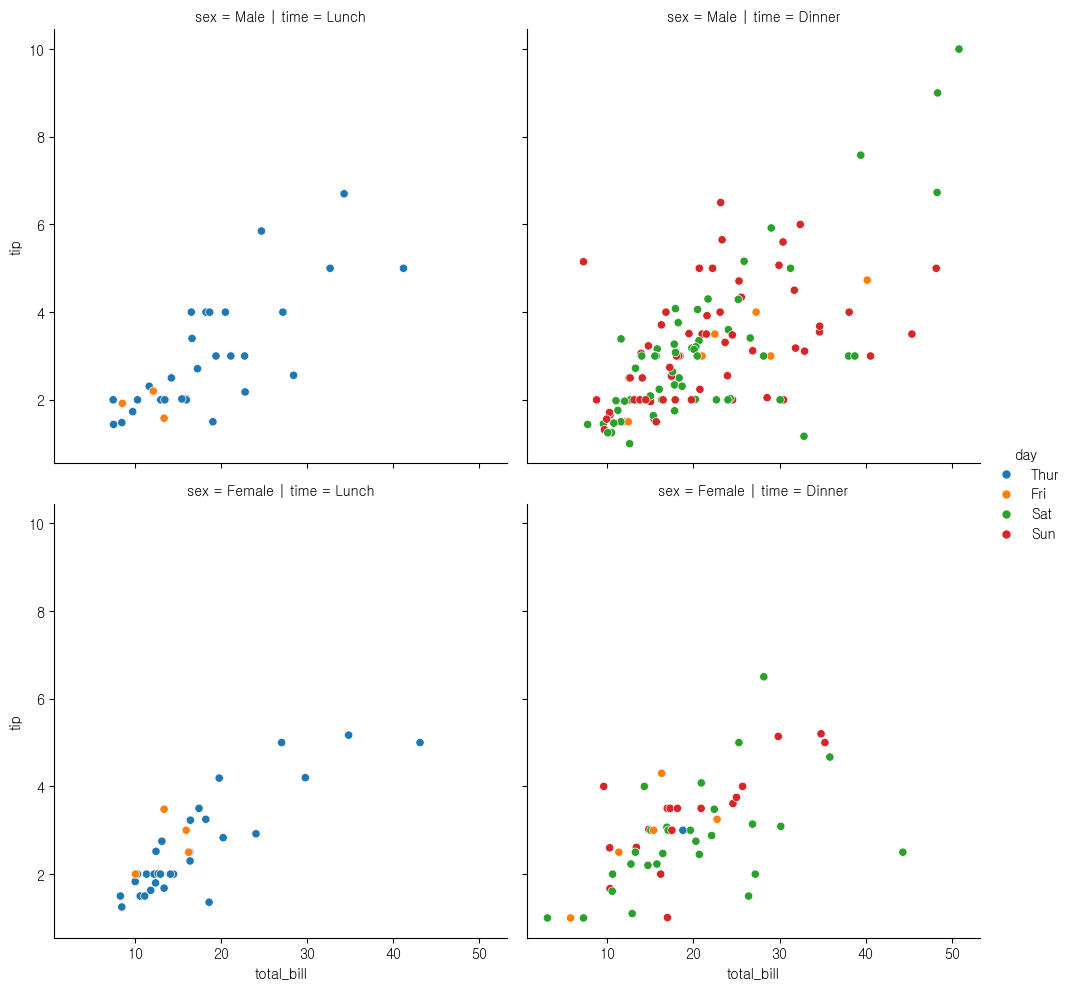

In [41]:
# sex 컬럼으로 행(row)을 분할, time 컬럼으로 열(column) 분할, 색상은 day 컬럼
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", row="sex")

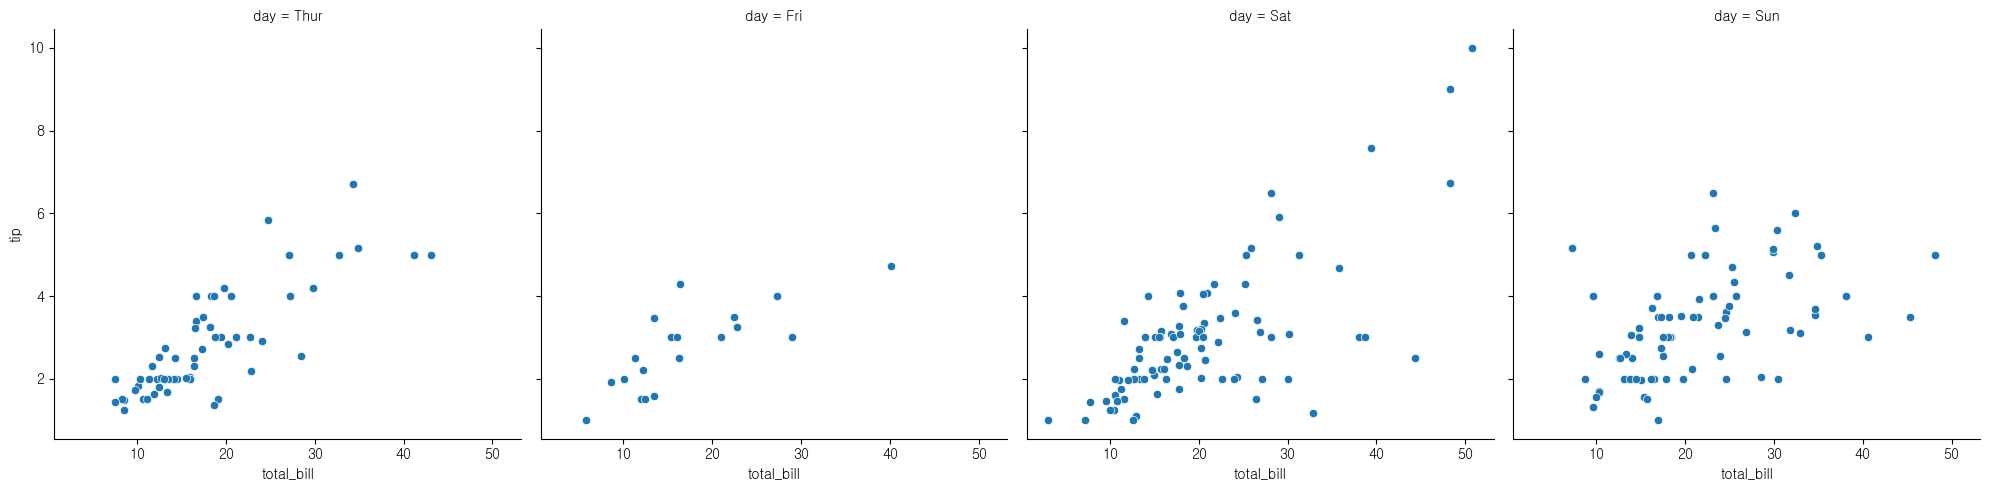

In [42]:
sns.relplot(x="total_bill", y="tip", data=tips, col='day')

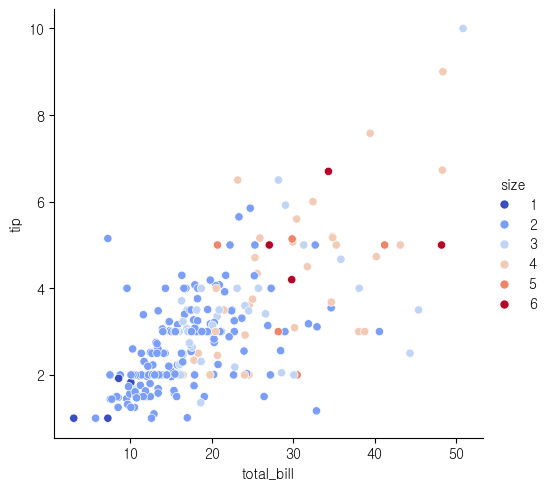

In [34]:
sns.relplot(x="total_bill", y="tip", data=tips, hue='size', palette='coolwarm')

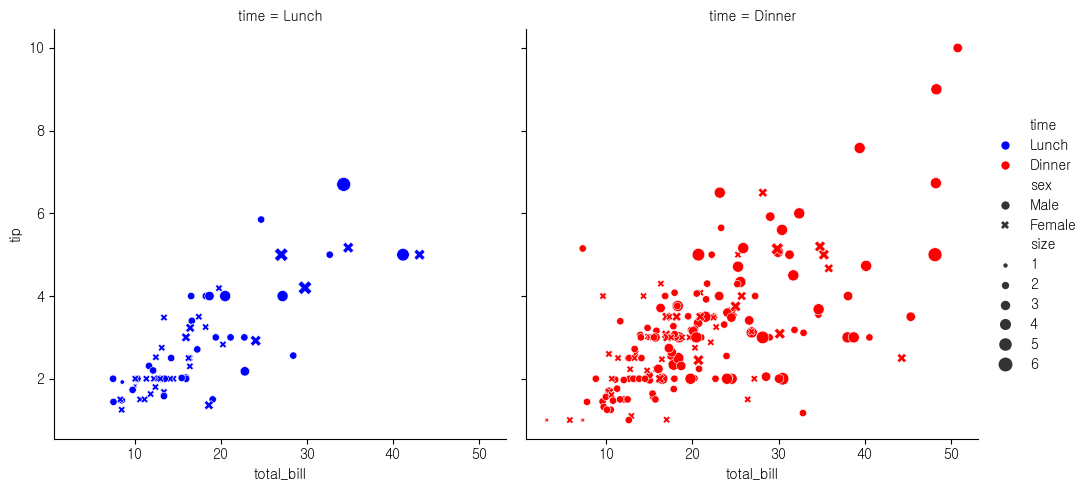

In [35]:
# sizes : size라는 인자를 사용할 때, 다른 값이 이 범위 내에서 정규화되도록 
#        사용할 최소 및 최대 크기를 지정하는 튜플
sns.relplot(
    data=tips, x="total_bill", y="tip", col="time",
    hue="time", size="size", style="sex",
    palette=["b", "r"], sizes=(10, 100)
)

#### catplot() : 범주형 데이터 시각화
- 숫자 변수와 하나 이상의 범주형 변수 간 관계를 보여주며,
kind 파라미터를 이용하여 데이터를 표현할 종류를 선택
- Parameters :
    - x, y, hue : x 및 y 축의 위치를 지정하는 변수 (데이터의 변수 이름)
    - data : 데이터프레임
    - row, col : 패싯을 결정하는 범주형 변수(데이터의 변수 이름)
    - kind* : 플롯의 종류. 옵션 = {strip, swarm, box, violin, boxen, point, bar, count}. 'strip'가 기본값
    - height : 각 패싯의 높이 (인치)
    - aspect : 각 패싯의 종횡비

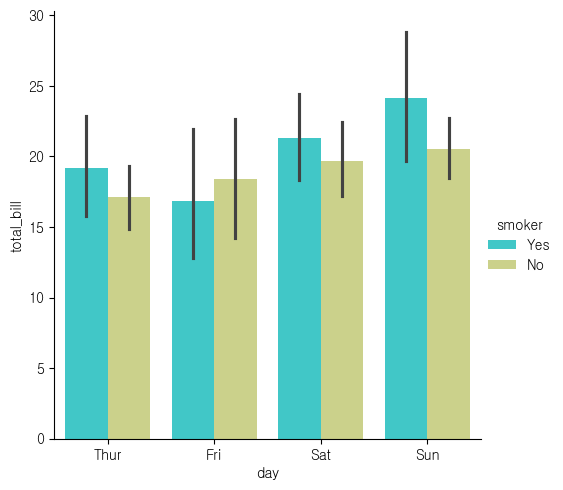

In [48]:
# kind="bar"
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker", palette="rainbow")

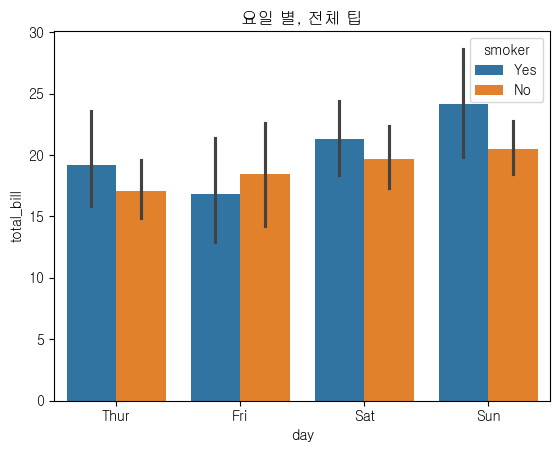

In [142]:
sns.barplot(x="day", y="total_bill", data=tips, hue="smoker")
plt.title("요일 별, 전체 팁")
plt.show()

- 누적 요약 막대그래프를 그리고 싶다면 sns.barplot 함수에 dodge=False을 추가하면 된다 
- Seaborn에서 누적 막대그래프는 평균값을 나타내는 막대의 최댓값 위에 다른 평균값을 나타내는 막대를 쌓아서 만드는 것이 아니라 
- 그래프 자체를 서로 겹쳐서 그린 것임.

<Axes: xlabel='day', ylabel='total_bill'>

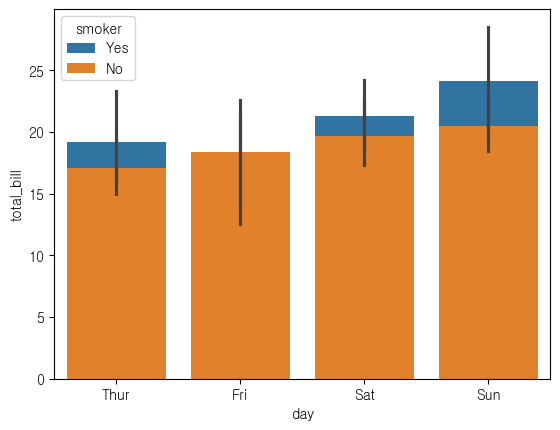

In [144]:
sns.barplot(x='day', y='total_bill', 
            hue='smoker', dodge=False,
            data=tips)

#### 범주형

<Axes: xlabel='day', ylabel='count'>

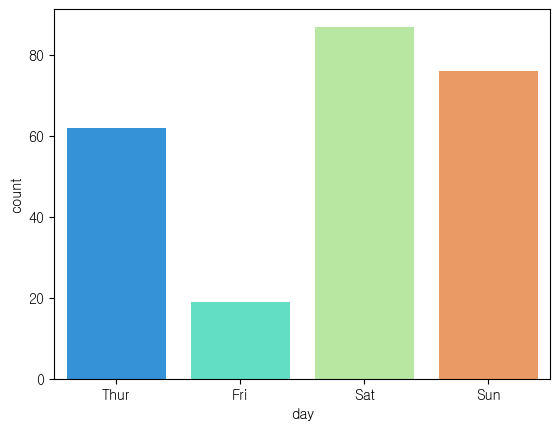

In [146]:
#countplot(x="변수", data=데이터프레임)
sns.countplot(x="day", data=tips, palette="rainbow")

<Axes: xlabel='sex', ylabel='tip'>

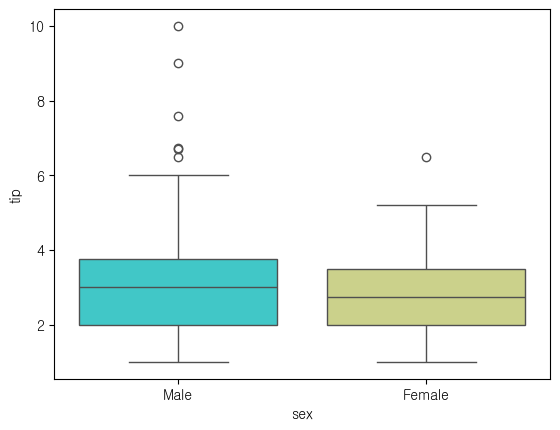

In [150]:
sns.boxplot(x= "sex",y= "tip",data= tips, palette="rainbow")

<Axes: >

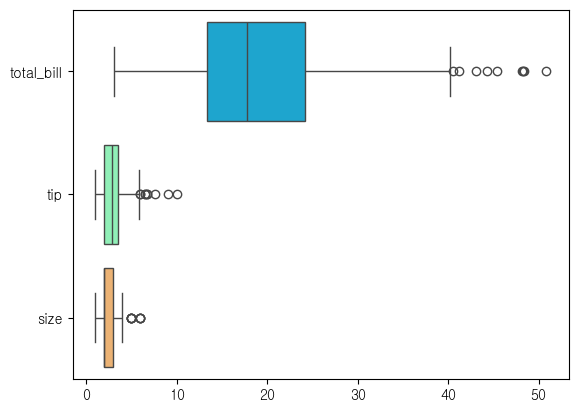

In [152]:
sns.boxplot(data= tips, orient="h", palette="rainbow")

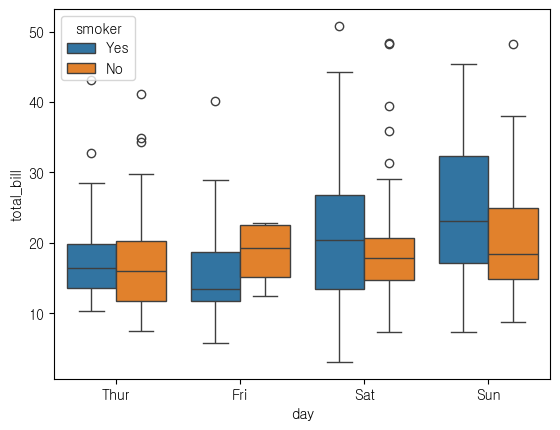

In [154]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)
plt.show()

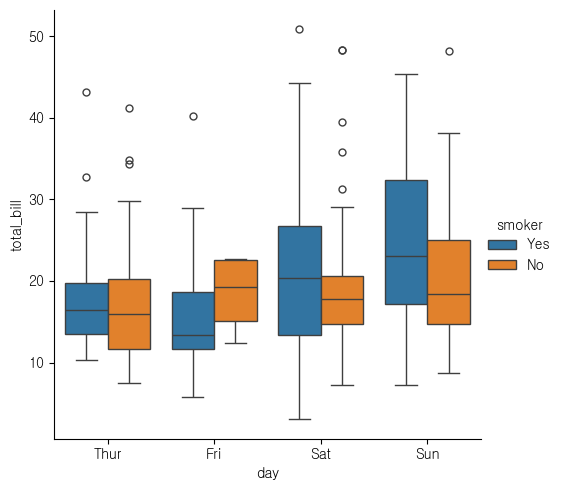

In [156]:
sns.catplot(x="day", y="total_bill", kind="box", 
            hue="smoker", data=tips)

In [49]:
# 수치형 데이터만 선택
tips_numeric = tips.select_dtypes(include='number')
tips_v= tips_numeric.corr() # 상관계수
tips_v

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

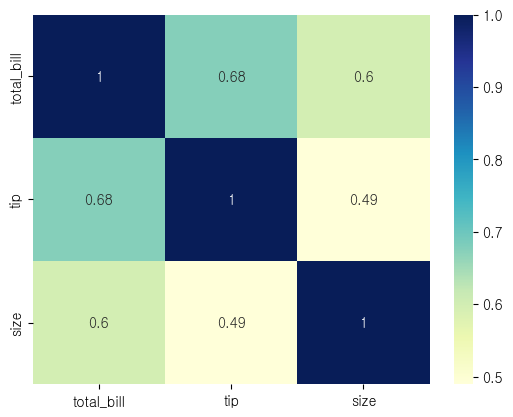

In [50]:
#히트맵
# tips_v: 상관계수 행렬, annot=True: 각 셀에 상관계수 값을 표시
#cmap='YlGnBu': 색상 맵을 'YlGnBu'로 설정
sns.heatmap(tips_v, annot=True, cmap='YlGnBu')

<Axes: >

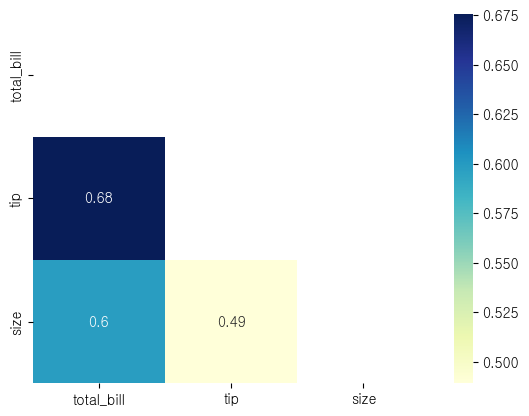

In [51]:
# NumPy의 triu 함수는 주어진 행렬의 상삼각 행렬(주대각선 위쪽의 값들만 남기고 나머지는 0으로 설정)로 변환.
# 상관계수 행렬의 대칭성을 활용하여 중복된 값을 제거하고, 상관계수의 시각적 해석을 간소화할 수 있다.
# mask=upp: mask 매개변수를 사용하여 상삼각 행렬의 값을 마스킹합니다. 즉, 상삼각 부분(주대각선 위쪽)은 히트맵에 표시되지 않게 된다.
upp = np.triu(tips_v)
sns.heatmap(tips_v, annot=True, cmap='YlGnBu', mask=upp)

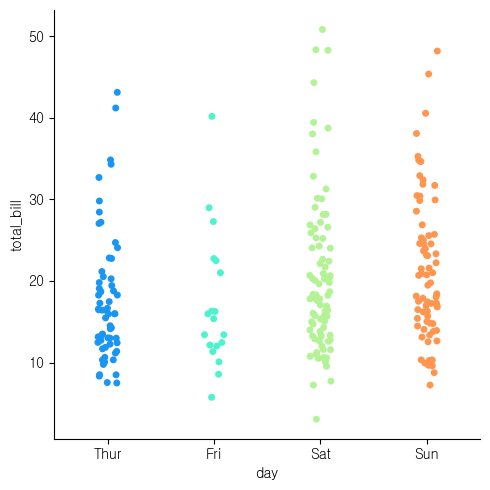

In [164]:
#범주형/연속형
sns.catplot(x="day", y="total_bill", data=tips, palette="rainbow")

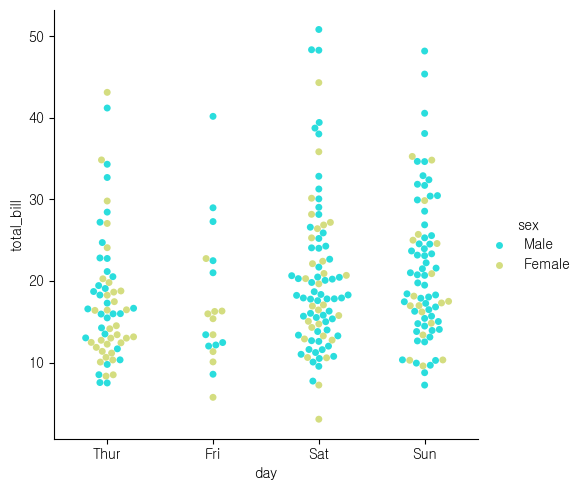

In [166]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips, palette="rainbow")

<Axes: xlabel='day', ylabel='total_bill'>

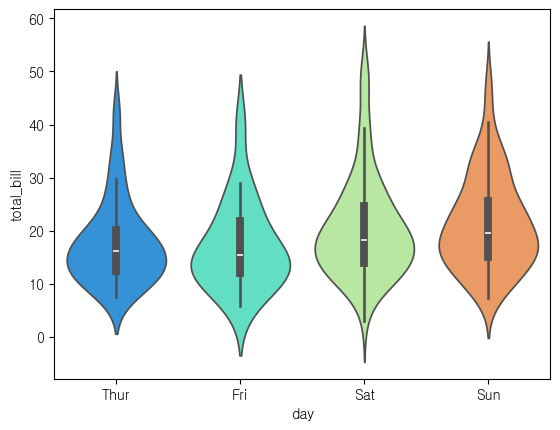

In [170]:
sns.violinplot(x="day", y="total_bill", data=tips, palette="rainbow")

<Axes: xlabel='day', ylabel='total_bill'>

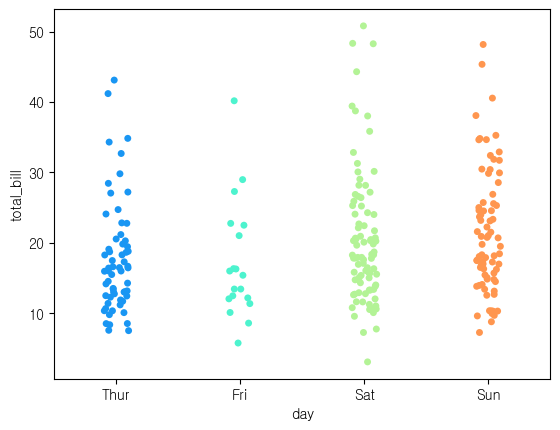

In [172]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, palette="rainbow")

<Axes: xlabel='day', ylabel='total_bill'>

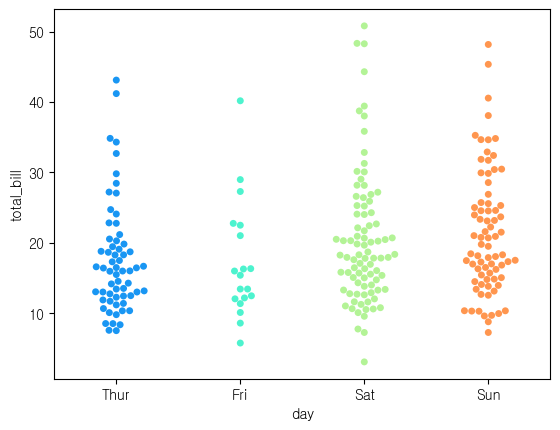

In [174]:
sns.swarmplot(x="day", y="total_bill", data=tips, palette="rainbow")

#### 다변량 연속형

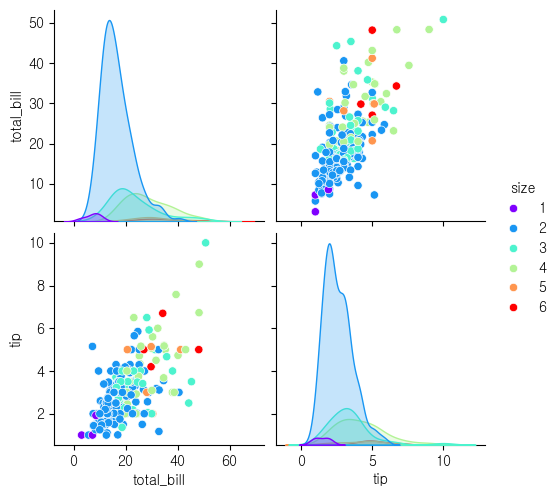

In [52]:
sns.pairplot(tips, hue='size', palette="rainbow")
plt.show()

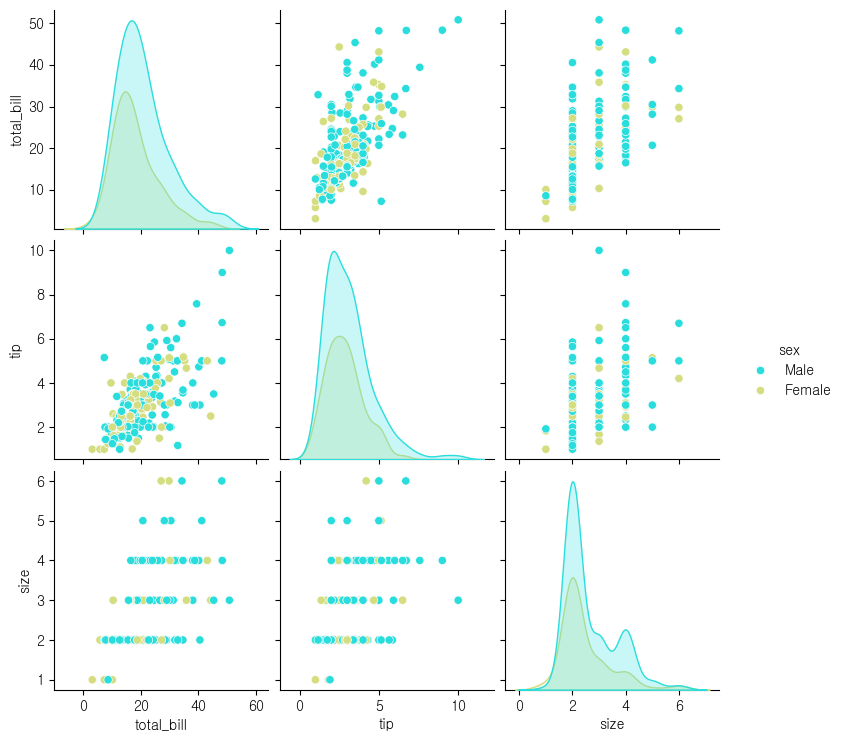

In [200]:
sns.pairplot(tips, hue="sex", palette="rainbow")
plt.show()

In [107]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [109]:
# 그룹화 및 평균 계산
table = tips.groupby(["day", "time"])[["tip", "total_bill"]].mean()
table

tip  total_bill
day  time                        
Thur Lunch   2.767705   17.664754
     Dinner  3.000000   18.780000
Fri  Lunch   2.382857   12.845714
     Dinner  2.940000   19.663333
Sat  Lunch        NaN         NaN
     Dinner  2.993103   20.441379
Sun  Lunch        NaN         NaN
     Dinner  3.255132   21.410000

- fillna(0).round(1) : 결측치값은 0으로 채우고, 소숫점 첫째자리까지 값을 표시
- fillna(0).astype(int) : 결측치값은 0으로 채우고 정수형으로 타입을 변환

In [111]:
# table.fillna(0).astype(int)
table.fillna(0).round(1)

tip  total_bill
day  time                   
Thur Lunch   2.8        17.7
     Dinner  3.0        18.8
Fri  Lunch   2.4        12.8
     Dinner  2.9        19.7
Sat  Lunch   0.0         0.0
     Dinner  3.0        20.4
Sun  Lunch   0.0         0.0
     Dinner  3.3        21.4

- fillna(0).astype(int) 이유 : 결측치가 하나라도 있으면 결측치 때문에 float 타입으로 나오게 됩니다.
- gradient(): 각 열(선택적으로 행)의 데이터에 따라 그라데이션으로 배경 색상을 지정

In [126]:
table.fillna(0).astype(int).style.background_gradient() 

[Text(0.5, 1.0, '흡연별 tip')]

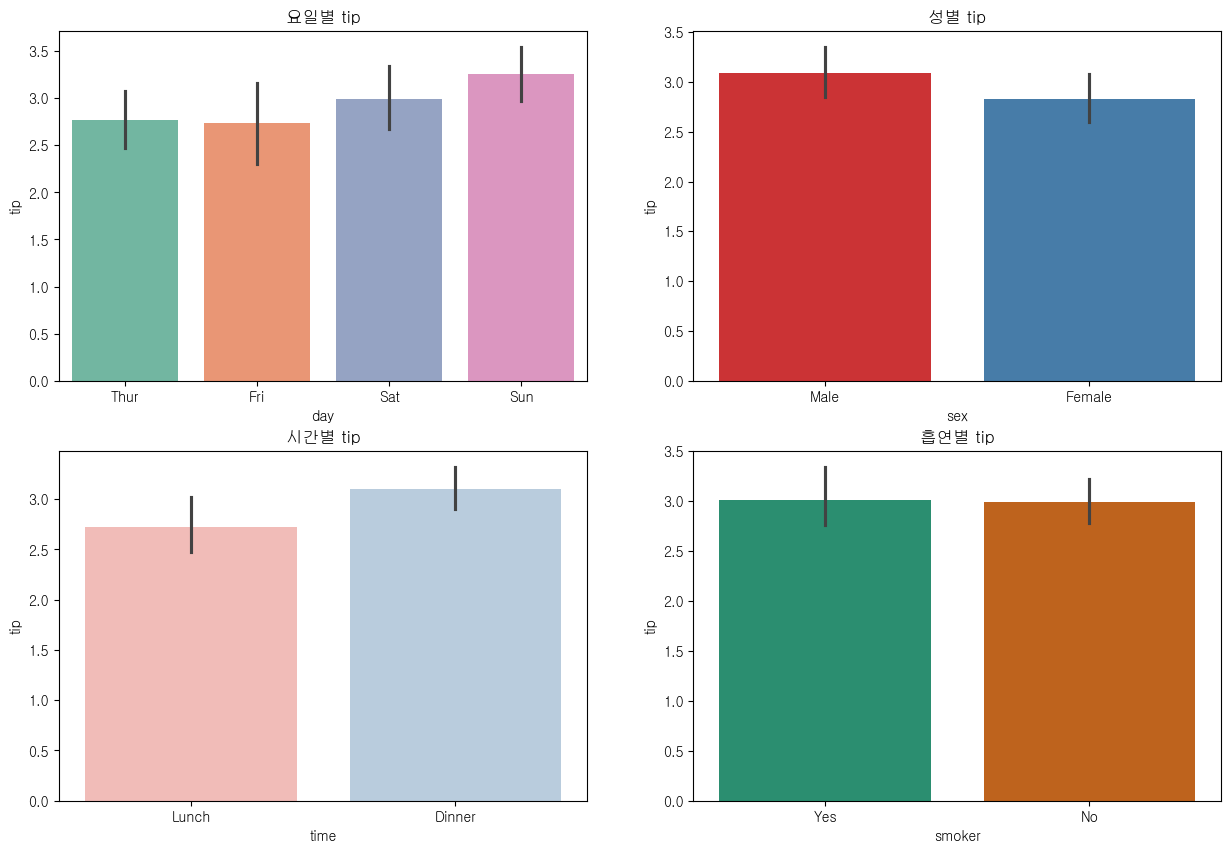

In [192]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(15, 10)
sns.barplot(data = tips, x="day", y="tip", ax=ax1, palette="Set2")
sns.barplot(data = tips, x="sex", y="tip", ax=ax2, palette="Set1")
sns.barplot(data = tips, x="time", y="tip", ax=ax3, palette="Pastel1")
sns.barplot(data = tips, x="smoker", y="tip", ax=ax4, palette="Dark2")

ax1.set(title="요일별 tip")
ax2.set(title="성별 tip")  
ax3.set(title="시간별 tip")
ax4.set(title="흡연별 tip")

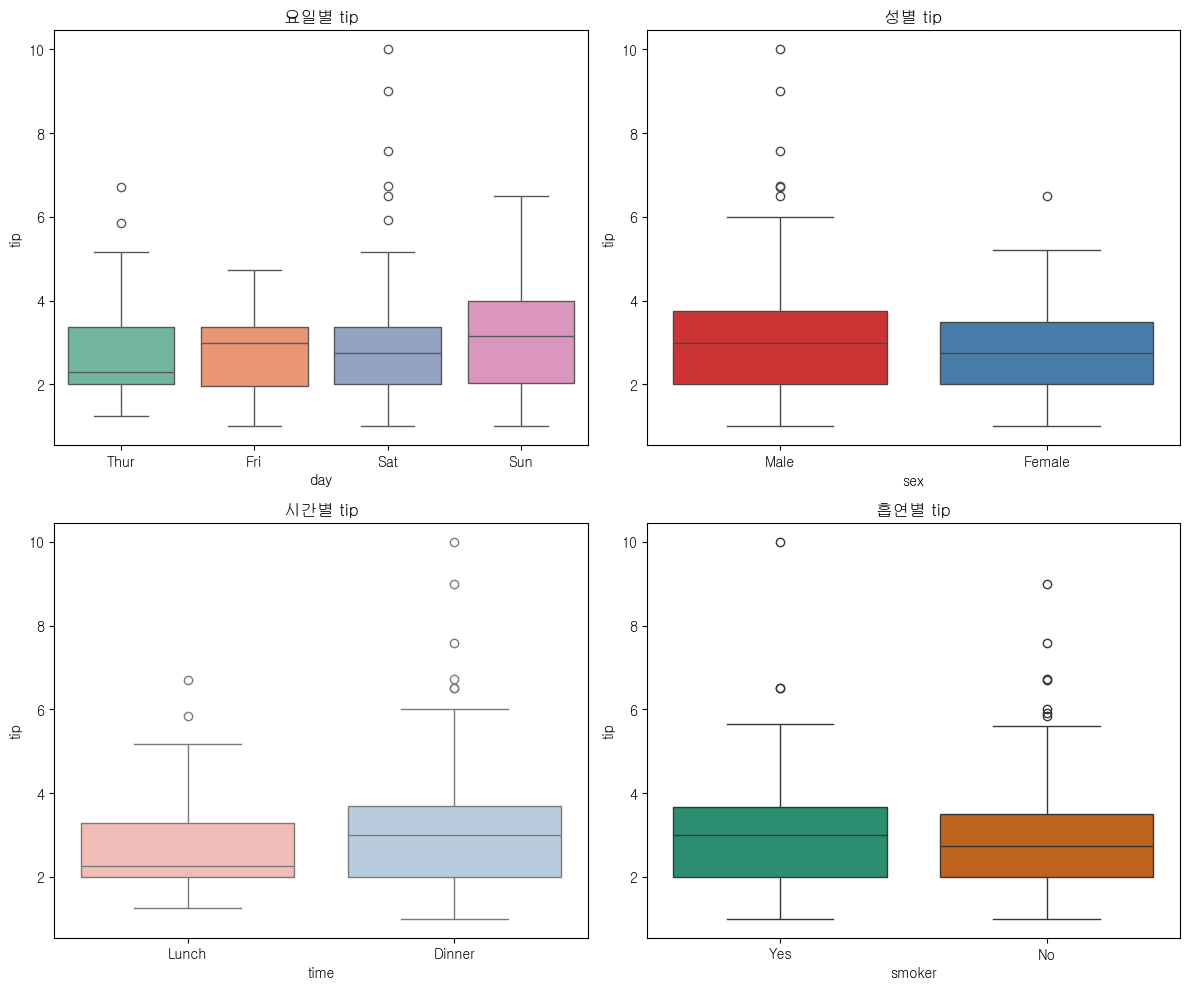

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)

# 각 박스플롯에 대해 서로 다른 색상 팔레트 지정
sns.boxplot(data=tips, x="day", y="tip", ax=ax1, palette="Set2")
sns.boxplot(data=tips, x="sex", y="tip", ax=ax2, palette="Set1")
sns.boxplot(data=tips, x="time", y="tip", ax=ax3, palette="Pastel1")
sns.boxplot(data=tips, x="smoker", y="tip", ax=ax4, palette="Dark2")

# 각 축 제목 설정
ax1.set(title="요일별 tip")
ax2.set(title="성별 tip")  
ax3.set(title="시간별 tip")
ax4.set(title="흡연별 tip")

# 그래프 표시
plt.tight_layout()
plt.show()

#### 2. seaborn 시각화 실습해 보기

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('birth_rate.csv')
data

,시군구별,2017,2018,2019,2020,2021,2022,2023
0,서울특별시,0.836,0.761,0.717,0.642,0.626,0.593,0.552
1,부산광역시,0.976,0.899,0.827,0.747,0.728,0.723,0.664
2,대구광역시,1.067,0.987,0.932,0.807,0.785,0.757,0.702
3,인천광역시,1.007,1.006,0.940,0.829,0.778,0.747,0.694
4,광주광역시,1.053,0.972,0.913,0.811,0.896,0.844,0.706
5,대전광역시,1.075,0.952,0.883,0.805,0.810,0.842,0.787
6,울산광역시,1.261,1.131,1.084,0.984,0.940,0.848,0.814
7,세종특별자치시,1.668,1.566,1.472,1.277,1.277,1.121,0.971
8,경기도,1.069,1.002,0.943,0.878,0.853,0.839,0.766
9,강원특별자치도,1.123,1.067,1.082,1.036,0.979,0.968,0.893


In [49]:
data.columns[1:]

Index(['2017', '2018', '2019', '2020', '2021', '2022', '2023'], dtype='object')

In [50]:
col = data.columns[1:]
for i in col:
    print(i)

2017
2018
2019
2020
2021
2022
2023


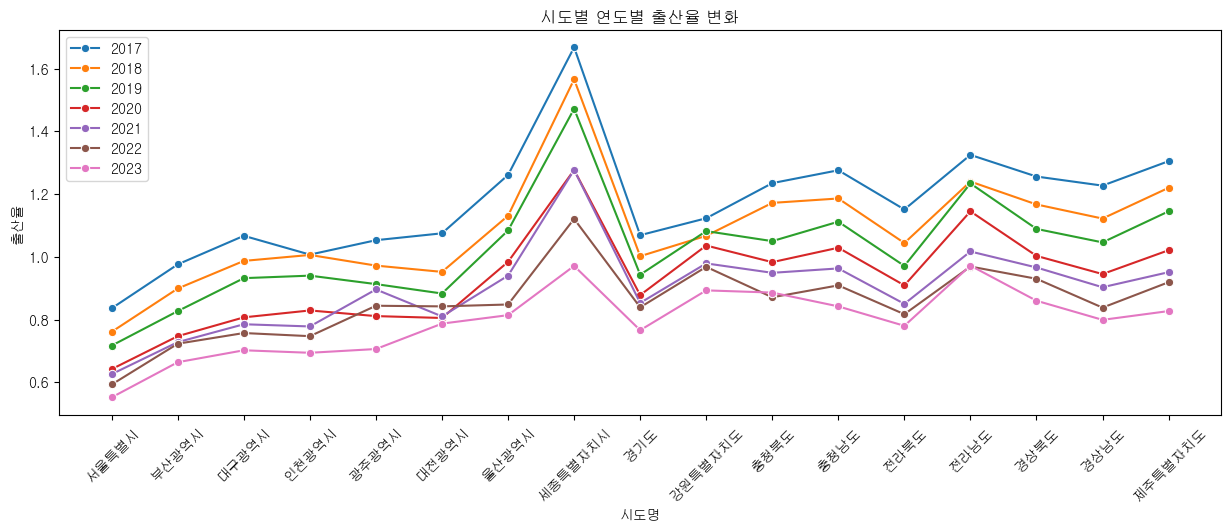

In [116]:
# 그래프 그리기
plt.figure(figsize=(15, 5))
col = data.columns[1:]
for i in col:
    sns.lineplot(data= data, x='시군구별', y= str(i), marker='o', label = str(i))
plt.title('시도별 연도별 출산율 변화')
plt.xlabel('시도명')
plt.ylabel('출산율')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, '2019~2023년도 시도별 출산율 변화')

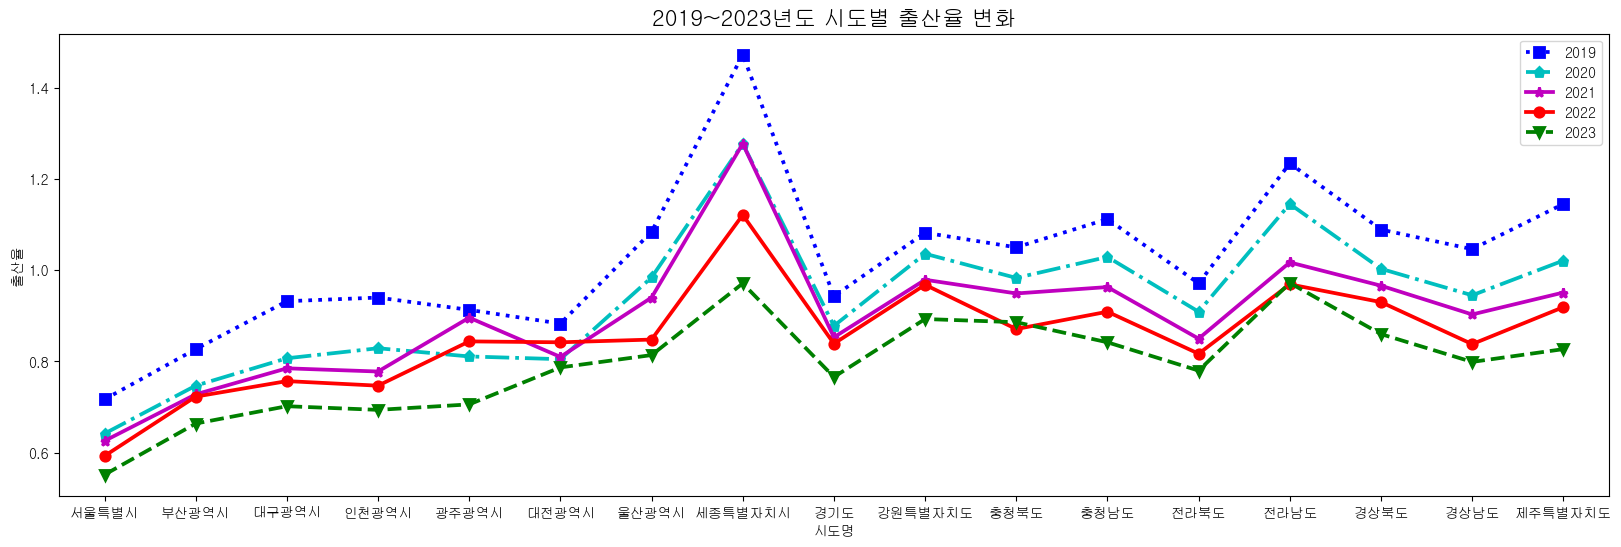

In [120]:
plt.figure(figsize=(20,6))

sns.pointplot(data = data, x='시군구별', y='2019', markers='s', linestyles=':', color='b', label='2019')
sns.pointplot(data = data, x='시군구별', y='2020', markers='p', linestyles='-.', color='c', label='2020')
sns.pointplot(data = data, x='시군구별', y='2021', markers='*', linestyles='-', color='m', label='2021')
sns.pointplot(data = data, x='시군구별', y='2022', markers='o', linestyles='-', color='r', label='2022')
sns.pointplot(data = data, x='시군구별', y='2023', markers='v', linestyles='--', color='g', label='2023')

plt.xlabel('시도명')
plt.ylabel('출산율')
plt.title('2019~2023년도 시도별 출산율 변화', fontsize=16)


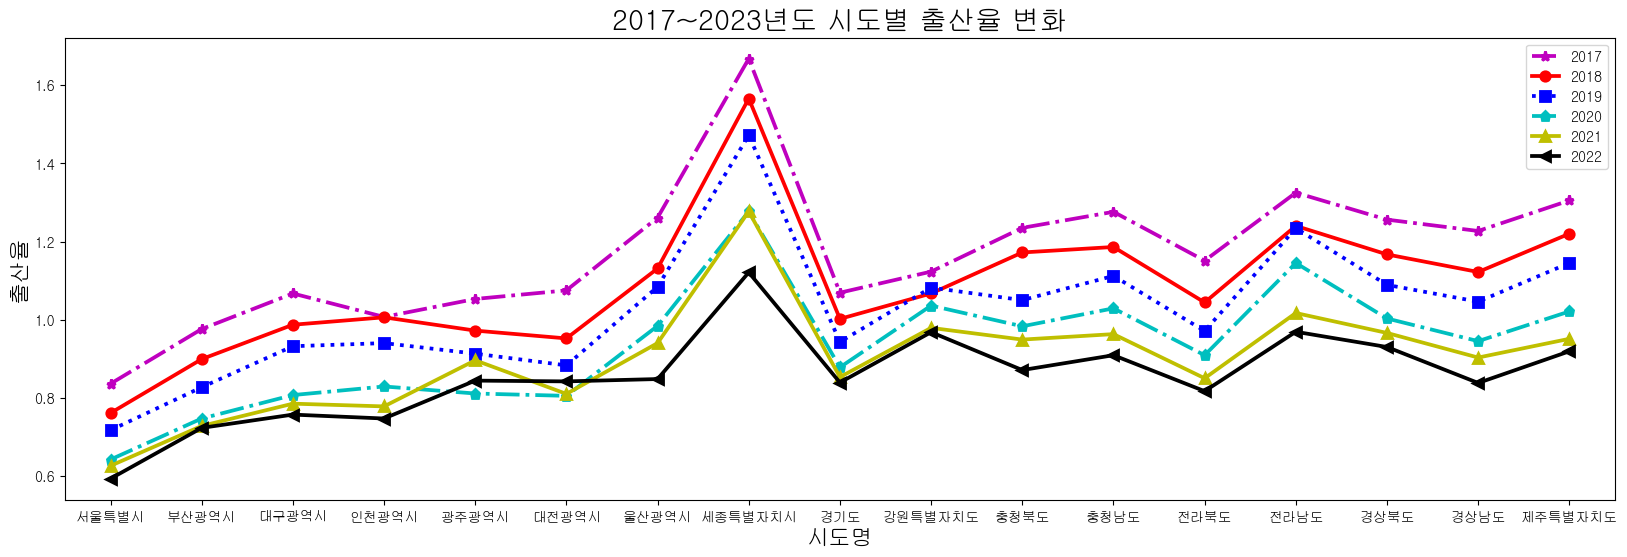

In [128]:
# 그래프 그리기
plt.figure(figsize=(20, 6))

# 각 연도에 대한 pointplot 그리기
for year, marker, linestyle, color in zip(['2017', '2018','2019', '2020', '2021', '2022', '2023'],
                                           ['*', 'o', 's', 'p', '^', '<', 'v'],
                                           ['-.', '-', ':', '-.', '-', '-'],
                                           ['m', 'r','b', 'c', 'y', 'k', 'g']):
    sns.pointplot(data=data, x='시군구별', y=year, markers=marker, linestyles=linestyle, color=color, label=year)

plt.xlabel('시도명', fontsize=16)
plt.ylabel('출산율', fontsize=16)
plt.title('2017~2023년도 시도별 출산율 변화', fontsize=20)
# plt.xticks(rotation=45)
plt.show()